Dynamic Modeling

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16576\1006095990.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ts[i+1]=T0
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16576\1006095990.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  es[i+1]=error
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16576\1006095990.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  us[i+1]=Q


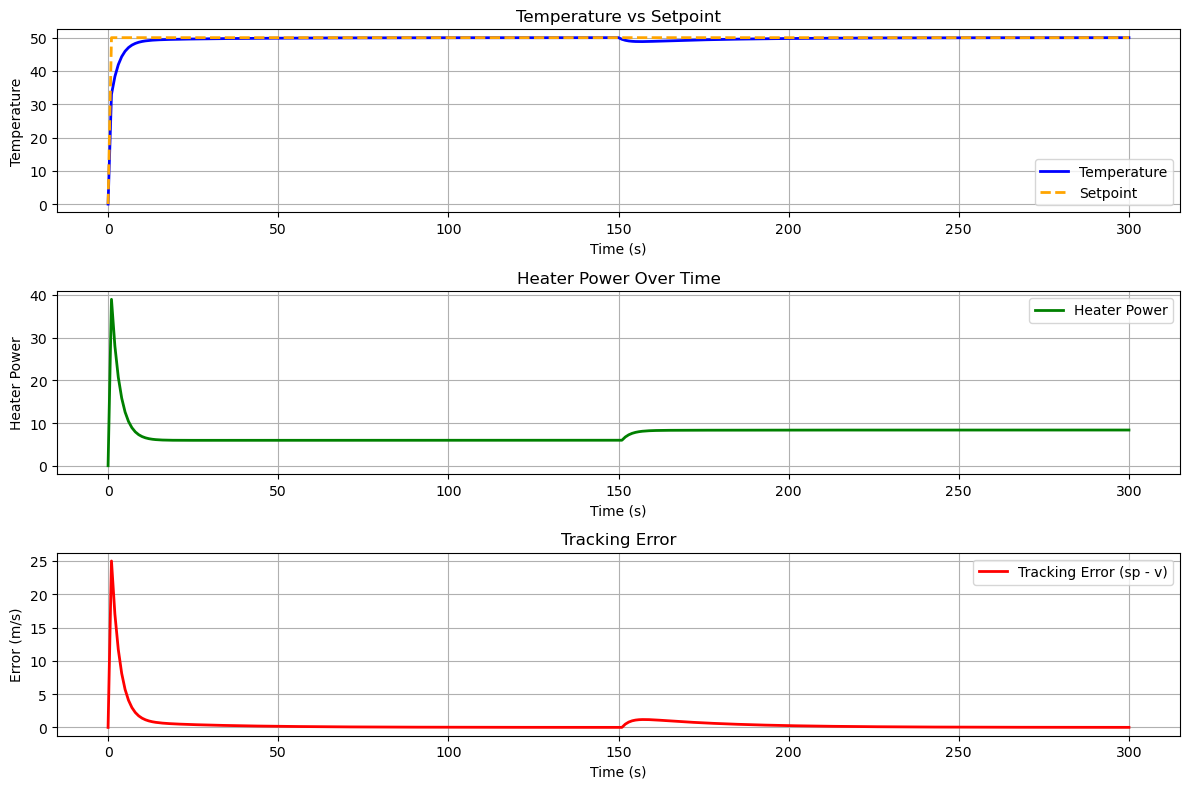

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def tank_model(T,t,T_in,Q):
    rho=1000.0 #Density of water
    Cp=4184.0 #Specific heat capacity For water at 25°C
    V=0.1 #Tank volume
    q=0.005 #Flow rate
    taup=V/q #Time constant 
    Kp=1/rho*Cp #Gain
    dTdt=(1/taup)*(T_in-T)+(Kp/taup)*Q
    return dTdt

#time
n=301
delta_t=300/(n-1)
t=np.linspace(0,300,n)

#initial condition 
T0=25.0
T_in=np.ones(n)*25.0
T_in[150:]=15.0 #disturbence in the inlet flow cause the reduced inlet temperature

#PI parameters
u_bias=0
Ki=0.5*3
taui=25.23
sum_i=0.0

#used to store the result
Ts=np.zeros(n)
es=np.zeros(n) #used to show error 
sp_store=np.zeros(n) #used to show setpoint
sp=50
us=np.zeros(n) #used to show controller output

for i in range(n-1):
    sp_store[i+1]=sp
    error=sp-T0
    es[i+1]=error
    sum_i=sum_i+error*delta_t
    Q=u_bias+Ki*error+Ki/taui*sum_i
    if Q>=500.0:
        u=500.0
        sum_i=sum_i-error*delta_t
    if Q<=0.0:
        Q=0.0
        sum_i=sum_i-error*delta_t
    us[i+1]=Q
    T=odeint(tank_model,T0,[0,1],args=(T_in[i], Q))
    T0=T[-1]
    Ts[i+1]=T0

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, Ts, label='Temperature', color='blue', linewidth=2)
plt.plot(t, sp_store, label='Setpoint', color='orange', linestyle='--', linewidth=2)
plt.title('Temperature vs Setpoint')
plt.xlabel('Time (s)')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, us, label='Heater Power', color='green', linewidth=2)
plt.title('Heater Power Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Heater Power')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, es, label='Tracking Error (sp - v)', color='red', linewidth=2)
plt.title('Tracking Error')
plt.xlabel('Time (s)')
plt.ylabel('Error (m/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [70]:
def compute_pid_parameters(Kp, theta_p, tau_p):
    # Compute controller gain Kc
    Kc = (0.586 / Kp) * (theta_p / tau_p) ** -0.916
    
    # Compute integral time tau_I
    tau_I = tau_p / (1.03 - 0.165 * (theta_p / tau_p))
    
    return Kc, tau_I

# Example usage
Kp = 4.184       # Process gain
theta_p = 5.0   # Process dead time
tau_p = 20.0    # Process time constant

Kc, tau_I = compute_pid_parameters(Kp, theta_p, tau_p)
print(f"Kc = {Kc:.4f}")
print(f"tau_I = {tau_I:.4f}")

Kc = 0.4986
tau_I = 20.2276
